# Discrete Fourier Transform: Instrument Harmonics

In [1]:
import numpy as np
import scipy.fftpack as fft
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
from IPython import display
import librosa
import librosa.display

%matplotlib inline

## Test Signal

In [19]:
fs = 100
f = 2  # in HZ
dur = 12  # in s
x = np.zeros(dur * fs)
t = np.arange(0, x.shape[0]) / fs
x[:4 * fs] = 0.2 * np.sin(2 * np.pi * f * t[:4 * fs])
x[4 * fs:8 * fs] = 1.0 * np.sin(2 * np.pi * f * t[4 * fs:8 * fs])
x[8 * fs:12 * fs] = 0.5 * np.sin(2 * np.pi * f * t[8 * fs:12 * fs])

# x[:4 * fs] = 1.0 * np.sin(2 * np.pi * f * t[:4 * fs])
# x[4 * fs:8 * fs] = 1.0 * np.sin(2 * np.pi * 2 * f * t[4 * fs:8 * fs])
# x[8 * fs:12 * fs] = 1.0 * np.sin(2 * np.pi * 3 * f * t[8 * fs:12 * fs])

# x = 1.0 * np.sin(2 * np.pi * f * t)

# x[:6 * fs] = 1.0 * np.sin(2 * np.pi * f * t[:6 * fs])
# x[6 * fs:12 * fs] = 0.5 * np.sin(2 * np.pi * 2 * f * t[6 * fs:12 * fs])

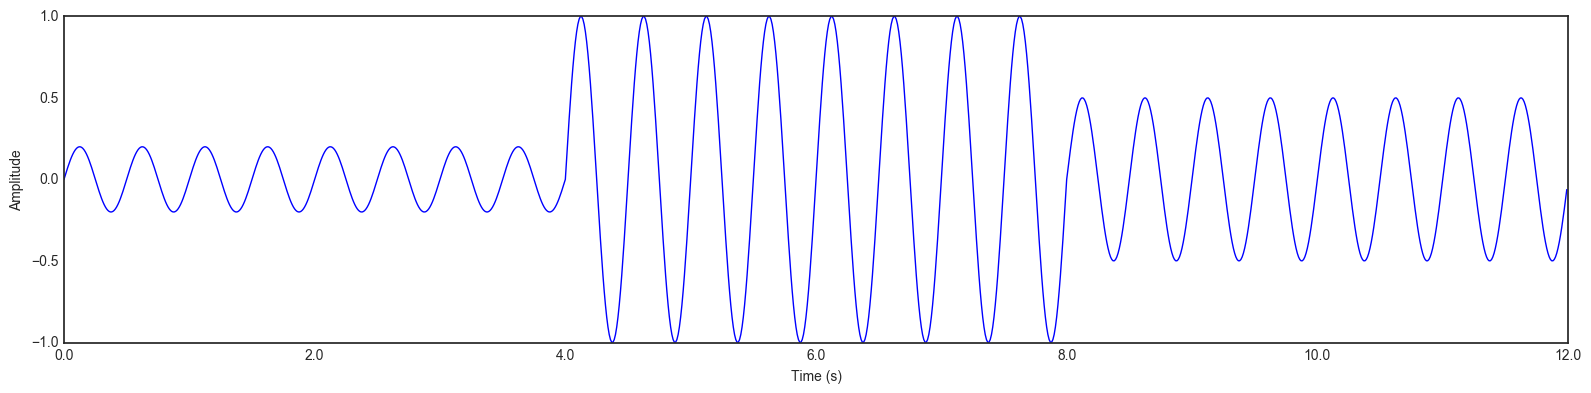

In [20]:
plt.figure(figsize=(16, 4))
plt.plot(x)
plt.xticks(plt.xticks()[0], plt.xticks()[0] / fs)
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.tight_layout()
plt.show()

## Frequency Analysis

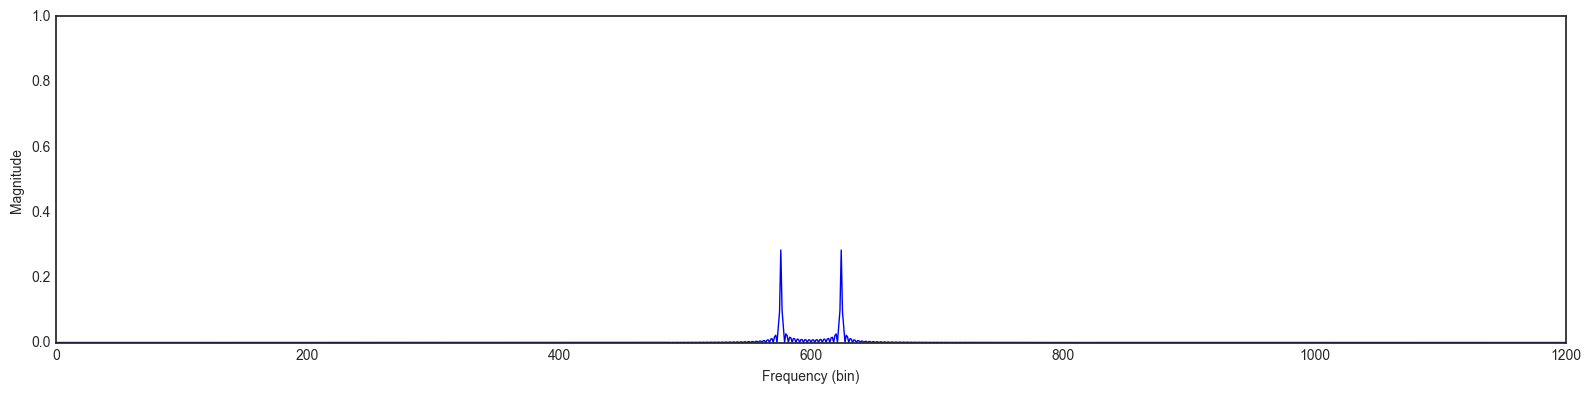

In [21]:
normalization = 1 / x.shape[0]
x_fft = fft.fft(x)
plt.figure(figsize=(16, 4))
plt.plot(np.abs(np.fft.fftshift(x_fft)) * normalization)
plt.xlabel('Frequency (bin)')
plt.ylabel('Magnitude')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

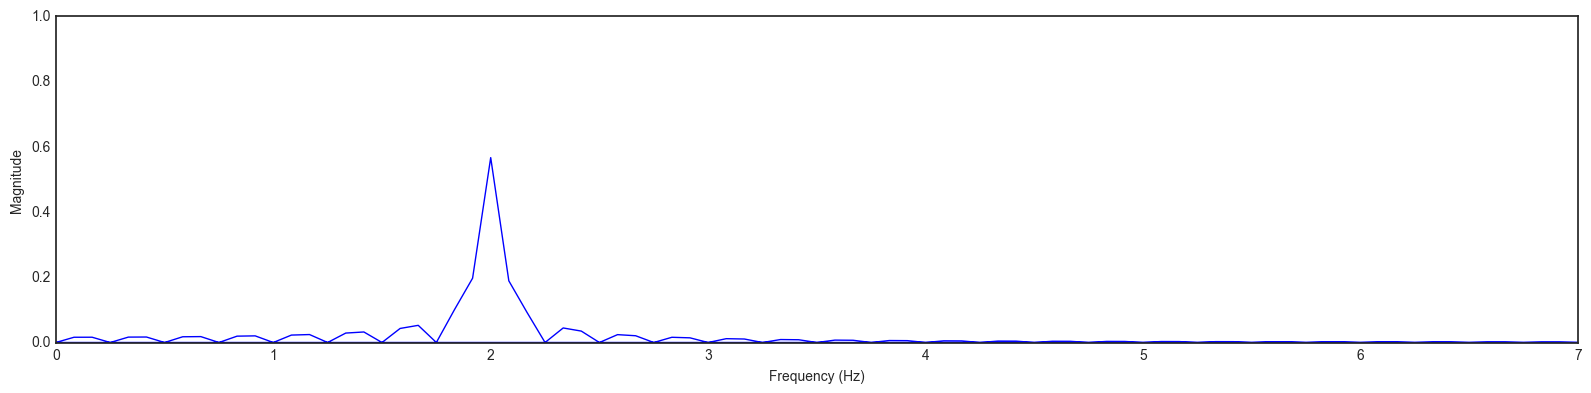

In [22]:
normalization = 2 / x.shape[0]
n_fft = x.shape[0]
K = int(1 + n_fft // 2)
f_coeff = np.fft.fftfreq(n_fft, d=1/fs)
x_fft_pos = x_fft[:K]
f_cutoff = 10

plt.figure(figsize=(16, 4))
plt.plot(f_coeff[:K], np.abs(x_fft_pos) * normalization)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, 7)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()